## Feature Selection: Forward and Backward Feature Elimination

In this notebook, we will go through implementing Wrapper Models for feature Selection. We will work on a  Linear Regression problem.

In [ ]:
#### import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import cross_val_score, train_test_split, KFold 
from sklearn.metrics import mean_squared_error

### 1- Data 

In [150]:
data = pd.read_csv('cancer-mortality-rate.csv', index_col=0)
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctMarriedHouseholds-8,PctMarriedHouseholds-9,BirthRate-2,BirthRate-3,BirthRate-4,BirthRate-5,BirthRate-6,BirthRate-7,BirthRate-8,BirthRate-9
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,6.091992e+13,3.219988e+15,37.440093,229.089604,1401.760576,8577.136107,52482.046553,321128.774915,1.964933e+06,1.202309e+07
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,1.796146e+13,8.149565e+14,18.775717,81.356978,352.527560,1527.535610,6618.957797,28680.576760,1.242757e+05,5.384984e+05
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,7.720681e+13,4.203515e+15,13.909079,51.873742,193.462489,721.515996,2690.885118,10035.623263,3.742773e+04,1.395863e+05
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,4.592263e+13,2.343042e+15,21.195350,97.580016,449.242856,2068.242577,9521.859503,43837.125013,2.018191e+05,9.291432e+05
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,7.259662e+13,3.922211e+15,46.194552,313.968540,2133.936595,14503.635908,98576.244063,669988.956897,4.553685e+06,3.094984e+07


In [151]:
data.shape

(3047, 280)

In [152]:
# cl = data.columns
# for i in cl:
#     if data[i].isna().sum()!=0:
#         print("la colonne {} a {} nan values".format(i,data[i].isna().sum()))

### 2- Data Preprocessing

In [153]:
#Check Nan values
for col in data.columns:
    if data[col].isna().sum()!=0:
        print(f"Col: {col}, Number of nan value: {data[col].isna().sum()}")

Col: PctSomeCol18_24, Number of nan value: 2285
Col: PctEmployed16_Over, Number of nan value: 152
Col: PctPrivateCoverageAlone, Number of nan value: 609
Col: PctSomeCol18_24-2, Number of nan value: 2285
Col: PctSomeCol18_24-3, Number of nan value: 2285
Col: PctSomeCol18_24-4, Number of nan value: 2285
Col: PctSomeCol18_24-5, Number of nan value: 2285
Col: PctSomeCol18_24-6, Number of nan value: 2285
Col: PctSomeCol18_24-7, Number of nan value: 2285
Col: PctSomeCol18_24-8, Number of nan value: 2285
Col: PctSomeCol18_24-9, Number of nan value: 2285
Col: PctEmployed16_Over-2, Number of nan value: 152
Col: PctEmployed16_Over-3, Number of nan value: 152
Col: PctEmployed16_Over-4, Number of nan value: 152
Col: PctEmployed16_Over-5, Number of nan value: 152
Col: PctEmployed16_Over-6, Number of nan value: 152
Col: PctEmployed16_Over-7, Number of nan value: 152
Col: PctEmployed16_Over-8, Number of nan value: 152
Col: PctEmployed16_Over-9, Number of nan value: 152
Col: PctPrivateCoverageAlone-2,

In [154]:
for col in data.columns:
    if data[col].isna().sum()!=0:
        data[col][data[col].isna()] = data[col].mean()

<ipython-input-154-c566dc43fe4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col].isna()] = data[col].mean()


In [155]:
y = data['TARGET_deathRate']
X = data.drop(columns=['TARGET_deathRate'])
normalized_X = (X - X.mean()) / X.std()

X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, y, test_size = .2, random_state=123)

### 3- Fit a LR model on all features

In [156]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_pred, Y_test)))

RMSE:  112255.8675650906


In [157]:
kf = KFold(n_splits=5, random_state= 42)
print(kf)  

# KFold training helper function
def KFold_train(model, X, Y, kf):
    scores = []
    for train_index, val_index in kf.split(X): #we split the train to KFold cross validate
        x_train, x_val = X[train_index], X[val_index]
        y_train, y_val = Y[train_index], Y[val_index]
        model.fit(x_train, y_train)
        pred_y = model.predict(x_val)
        scores.append(mean_squared_error(y_val, pred_y)**.5)
    
    return np.mean(np.array(scores))

KFold(n_splits=5, random_state=42, shuffle=False)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Feature selection greedy methods

In [158]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2437, 279), (610, 279), (2437,), (610,))

## 4 -  Forward Search
<img src='forward.png'>

In [159]:
def forward_search(model, K, X, Y):
    
    rmse_losses = []
    best_losses = []
    set_features = []
    all_scores = []
    
    ### get all the features of the data
    features =  list(X.columns)
    i = 1 # this index handles the case of one feature where reshaping is needed (do not care about it)
    while len(set_features) <= K:
        rmse_losses = []

        for feature in features:

            # Extract X with the subset of features
            new_feature = [feature] + set_features

            # Extract X with the subset of new features
            new_data = X[new_feature].values
            
            #split the new_data in train and validation(test_size = 20%)
            x_train, x_val, y_train, y_val = train_test_split(new_data, Y.values, test_size = 0.2, random_state =123)

            if i == 1:
                x_train = x_train.reshape(-1, 1)
                x_val = x_val.reshape(-1, 1)

            #Cross validation using the KFold_train function
            scores= KFold_train(model, x_train, y_train, kf)
            
            # Fit the model on the training set
            model.fit(x_train,y_train) ## Replace with your code
            
            #Make Prediction on the validation set
            ypred = model.predict(x_val) 

            #Calculate the RMSE on the validation set
            rmse_loss = np.sqrt(mean_squared_error(ypred, y_val))

            rmse_losses.append(rmse_loss)
        
        i += 1
        #select feature that give the best RMSE
        present_best_feature = features[np.argmin(rmse_losses)]# None
        
        #remove that present best feature from the initial set of input features, we will not include it again
        features.remove(features[np.argmin(rmse_losses)]) ### replace with your code### #del features[np.argmin(rmse_losses)]
        
        
        #add the present best feature to set_features
        set_features.append(present_best_feature) ### replace with your code###
        
        all_scores.append(np.mean(scores))
        best_losses.append(np.min(rmse_losses))
        print('K=',len(set_features),':',set_features, ' || RMSE: ', np.min(rmse_losses) )
    return set_features,all_scores,best_losses

In [160]:
### Let us fix a value of K, in this case k = d**.5
K = int(X.shape[1]**.5)
lr = LinearRegression()
best_features, scores, best_losses = forward_search(lr, K, X_train, Y_train)

K= 1 : ['PctBachDeg25_Over']  || RMSE:  22.662049885228207
K= 2 : ['PctBachDeg25_Over', 'incidenceRate']  || RMSE:  19.953431283868007
K= 3 : ['PctBachDeg25_Over', 'incidenceRate', 'povertyPercent-2']  || RMSE:  19.039811170721464
K= 4 : ['PctBachDeg25_Over', 'incidenceRate', 'povertyPercent-2', 'PercentMarried-8']  || RMSE:  18.798883392570474
K= 5 : ['PctBachDeg25_Over', 'incidenceRate', 'povertyPercent-2', 'PercentMarried-8', 'PctHS25_Over']  || RMSE:  18.57963992023238
K= 6 : ['PctBachDeg25_Over', 'incidenceRate', 'povertyPercent-2', 'PercentMarried-8', 'PctHS25_Over', 'PctSomeCol18_24-9']  || RMSE:  18.331880650948897
K= 7 : ['PctBachDeg25_Over', 'incidenceRate', 'povertyPercent-2', 'PercentMarried-8', 'PctHS25_Over', 'PctSomeCol18_24-9', 'MedianAgeFemale-5']  || RMSE:  18.256059364321825
K= 8 : ['PctBachDeg25_Over', 'incidenceRate', 'povertyPercent-2', 'PercentMarried-8', 'PctHS25_Over', 'PctSomeCol18_24-9', 'MedianAgeFemale-5', 'PctOtherRace']  || RMSE:  18.141961180195473
K= 9 

Best Features from Forward Search:  ['PctBachDeg25_Over', 'incidenceRate', 'povertyPercent-2', 'PercentMarried-8', 'PctHS25_Over', 'PctSomeCol18_24-9', 'MedianAgeFemale-5', 'PctOtherRace', 'PctOtherRace-2', 'PctWhite-7', 'BirthRate-2', 'PctBlack-2', 'PctOtherRace-7', 'PctUnemployed16_Over', 'popEst2015-6', 'PctPublicCoverage-7', 'PctHS25_Over-2']


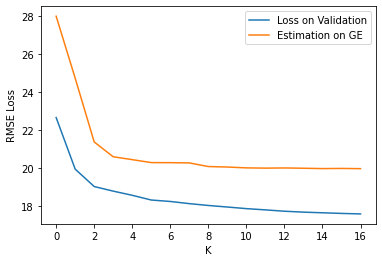

In [161]:
print('Best Features from Forward Search: ',best_features)
plt.plot(best_losses, label='Loss on Validation')
plt.plot(scores, label='Estimation on GE')
plt.xlabel('K')
plt.ylabel('RMSE Loss')
plt.legend()

In [162]:
### Make prediction on our Test Set with the new set of features
test_pred = lr.predict(X_test[best_features])

### Compute the RMSE
rmse = np.sqrt(mean_squared_error(test_pred, Y_test))
print('RMSE Test Loss: ', rmse)

RMSE Test Loss:  32.6481332287578


## 5-Backward Search

Backward search
starts off with F = {1, . . . , d} as the set of all features
1. Train the model with all the features

2. repeatedly delete features one at a time (evaluating single-feature deletions in a similar manner to how forward search evaluates single-feature additions) until F = ∅

In [167]:
def backward_search(model, X, Y, K):
    
    ### get the features of the data
    features = X.columns.tolist()
    
    rmse_losses = []
    best_losses = []
    best_features = []
    subset_feature = features
    all_scores = []
    
    while len(subset_feature) > K:
        all_poss_features = []
        rmse_losses = []
        for feature in features:
            subset_feature = features.copy()
            subset_feature.remove(feature)

            # Extract X with the subset of new features
            new_data = X[subset_feature].values
            
            #split the new_data in train and validation(test_size = 20%)
            x_train, x_val, y_train, y_val = train_test_split(new_data, Y.values, test_size = 0.2, random_state = 123)

            y_train = y_train.reshape(-1, 1)
            y_val = y_val.reshape(-1, 1)

            #Cross validation using the KFold_train function
            scores= KFold_train(model, x_train, y_train, kf)
            
             # Fit the model on the training set
            model.fit(x_train,y_train) ## Replace with your code
            
            #Make Prediction on the validation set
            ypred = model.predict(x_val) 

            #Calculate the RMSE on the validation set
            rmse_loss = np.sqrt(mean_squared_error(ypred, y_val))

            rmse_losses.append(rmse_loss)
            all_poss_features.append(subset_feature)
    
        #Remove the feature f_i that, when eliminated, gives the best RMSE so far.
        #ie if F-{f_i} gives the best RMSE so far, f_i will not be considered again on next iterations
        feature_to_eliminate = features[np.argmin(rmse_losses)]
        
        #remove that feature from the initial set of input features
        features.remove(features[np.argmin(rmse_losses)]) ### replace with your code###
          
        best_features.append(all_poss_features[np.argmin(rmse_losses)])
        all_scores.append(np.mean(scores))
        best_losses.append(np.min(rmse_losses))
    return best_features, best_losses

In [ ]:
K = 250
lr = LinearRegression()
best_features, best_losses = backward_search(lr, X_train, Y_train, K)

In [ ]:
print('Best Features from Backward Search: ', best_features)
plt.plot(best_losses, label='Loss on Validation')
plt.plot(scores, label='Estimation on G.E.')
plt.xlabel('K')
plt.label('RMSE Loss')
plt.legend()

In [ ]:
### Make prediction on our Test Set with the new set of features
test_pred = lr.predict()

### Compute the RMSE
rmse = None
print('RMSE Test Loss: ', rmse)

<b>Missing Value Ratio</b> is a filter method for Feature Selection that drops all the features that have a number of missing values greater than a certain threshold. 
Can you implement it using this previous dataset?